#### Credit card fraud prediction
In the current project, a data set from the US Irvine Machine Learning Repository was analyzed. The data set includes transactions made by credit cards during two days in September 2013 in Europe. There are totally 284,807 transactions. Among these transactions 492 are fraudulent. The dataset is highly imbalanced because fraudulent transactions account for 0.172% of all transactions. The data set contains totally 31 variables. 28 variables are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features are not provided. Two feature variables 'Time' and 'Amount' are not transformed by PCA. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The ‘Time’ variable is irrelevant to the current study and was deleted from the data frame. The feature 'Amount' is the transaction amount. The variable 'Class' is the target variable and it takes value 1 in case of fraud and 0 otherwise. The goal of this project is to build a few ML models, select the best one and select several the most important features in predicting fraud. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from numpy import argmax
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
#downloading dataset
df=pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Because the "Time" variable is irrelevant to analysis it will be deleted
df=df.drop(columns=["Time"], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

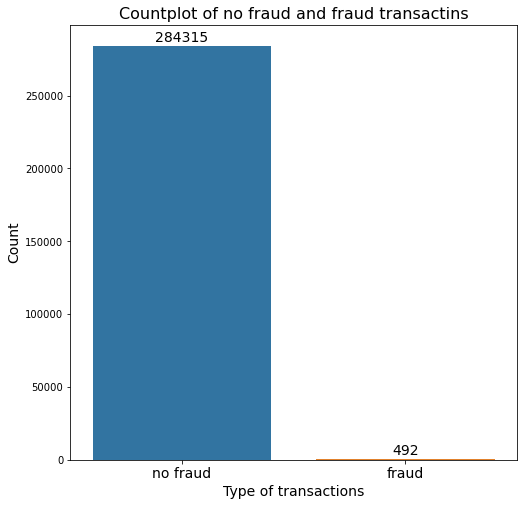

In [6]:
plt.figure(figsize=(8, 8))
# sn.countplot(x="Class", data=df, edgecolor=(0, 0, 0))
sn.countplot(x=df["Class"])
ax=plt.gca()
ax.set_xlabel("Type of transactions", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_xticklabels(["no fraud", "fraud"], fontsize=14)
ax.text(0, 287315, "284315", ha="center", fontsize=14)
ax.text(1, 3495, "492", ha="center", fontsize=14)
plt.title("Countplot of no fraud and fraud transactins", fontsize=16)
plt.show()
plt.show()


In [7]:
corr=round(df.corr(), 2)
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.0,0.00,0.00,-0.23,-0.10
V2,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.0,-0.00,-0.00,-0.53,0.09
V3,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.0,0.00,0.00,-0.21,-0.19
V4,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.0,0.00,-0.00,0.10,0.13
V5,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.0,0.00,-0.00,-0.39,-0.09
V6,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.0,-0.00,0.00,0.22,-0.04
V7,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.0,-0.00,-0.00,0.40,-0.19
V8,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.0,0.00,-0.00,-0.10,0.02
V9,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.0,-0.00,0.00,-0.04,-0.10
V10,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.00,...,0.00,-0.00,0.00,-0.00,-0.00,-0.0,-0.00,0.00,-0.10,-0.22


In [8]:
#the function correlation returns a list of correlated columns
def correlation(dataset, threshold):
    col_corr=[]
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#             print(corr_matrix.iloc[i, j])
            if abs(corr_matrix.iloc[i, j])>threshold:
                print(corr_matrix.iloc[i, j])
                colname=corr_matrix.columns[i]
                rowname=corr_matrix.index[j]
    
                col_corr.append((colname, rowname))
    return col_corr
corr_col=correlation(df.iloc[:, :-1], 0.7)
print("Highly correlated variables are ", corr_col)

Highly correlated variables are  []


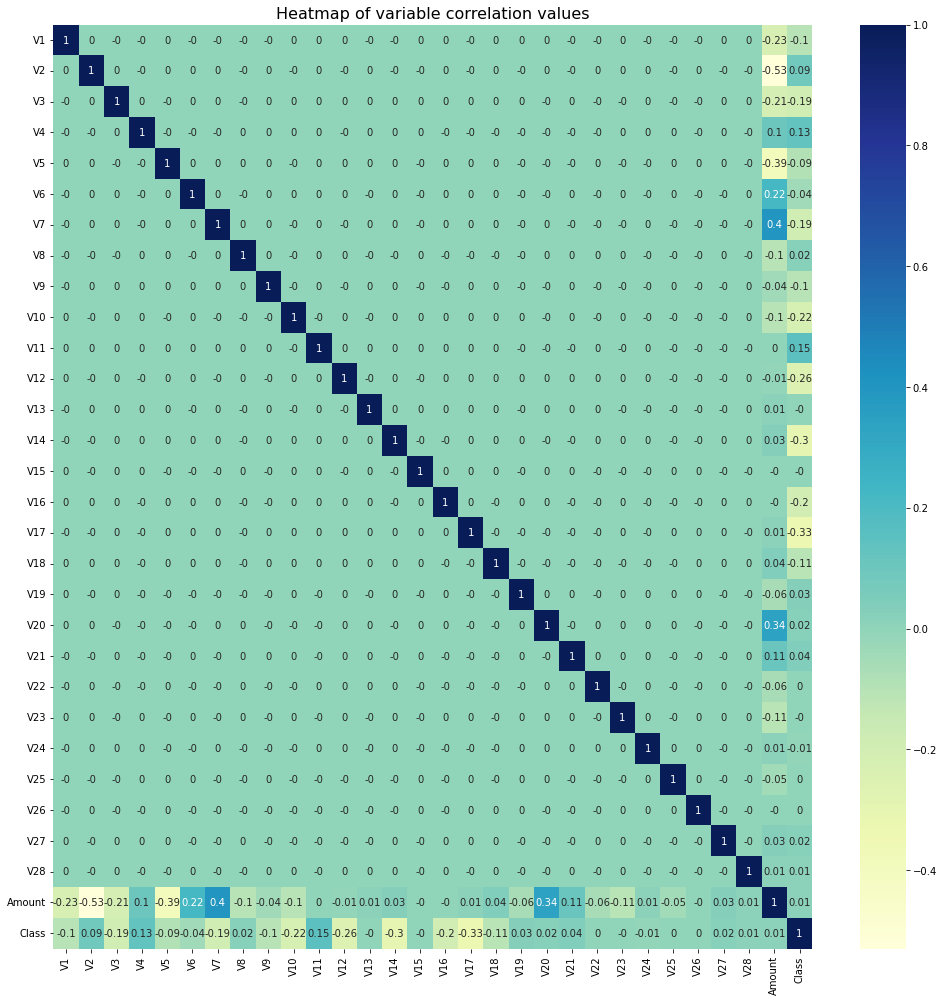

In [9]:
#visualization of correlation matrix
# %matplotlib notebook
plt.figure(figsize=(17, 17))
sn.heatmap(data=round(corr, 2), cmap="YlGnBu", annot=True)
plt.title("Heatmap of variable correlation values", fontsize=16)
plt.savefig("figure1.png")

Conclusion: There is no highly correlated features in the data set

In [10]:
#checking attributes of data frame
print(df.columns)
print(df.shape)
print(df.ndim)
print(df.index)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
(284807, 30)
2
RangeIndex(start=0, stop=284807, step=1)


In [11]:
#checking NaN values
df.isnull().sum(axis=0)

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Conclusion: There is no NaN values in the data set

In [12]:
#checking the values of the "Class" variable.
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
#data preprocessing
#x contains only feature variables
x=df.iloc[:, :-1]
#the columns_x variable contains variable names of x data frame
columns_x=x.columns
#y contains target variable
y=df.iloc[:, -1]
print(x)
y

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [14]:
# splitting dataset to train & test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


#### Decision Tree 

In [15]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier = DecisionTreeClassifier(criterion = 'entropy', class_weight="balanced", random_state = 1000)
model=Pipeline([
    ("scale", StandardScaler()),
    ("Tree", classifier)
]).fit(x_train, y_train)
predicted_labels=model.predict(x_test)

In [16]:
"""defining the confusion_matrix_visual() to visualize the confusion matrix"""
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    """y_test: true labels for y
       y_pred: predicted labels for y
       class_labels: labels of differemt classes
       ax: matplotlib axes
       title: the plot title
       **kwargs: additional arguments in the form of a dictionary"""
    matrix=confusion_matrix(y_true, y_pred)
    ax=sn.heatmap(matrix.T, square=True, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax,  **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Model Prediction")
    tick_marks=np.arange(len(class_labels))+0.5
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels, rotation=0)
    ax.set_title("Confusion matrix")
    return ax

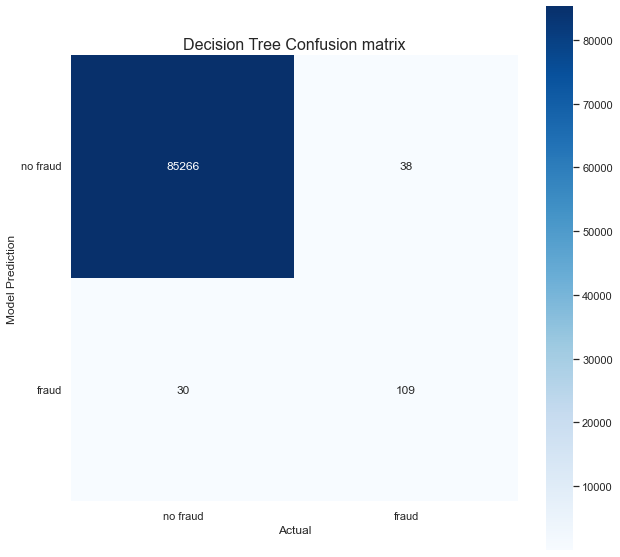

In [17]:
#visualizing the confusion matrix for Logistic Regression
sn.set(rc={'figure.figsize':(10,10)})
confusion_matrix_visual(y_test, predicted_labels, ["no fraud", "fraud"])
plt.title("Decision Tree Confusion matrix", fontsize=16)
plt.show()

In [18]:
feature_importances = model["Tree"].feature_importances_
feature_importances.shape

(29,)

In [19]:
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
data=pd.DataFrame({"sorted_importances":sorted_importances,"sorted_feature_names":sorted_feature_names})
data.head()

,sorted_importances,sorted_feature_names
0,0.680080,V14
1,0.076714,V4
2,0.027183,V12
3,0.025276,V20
4,0.018240,V21


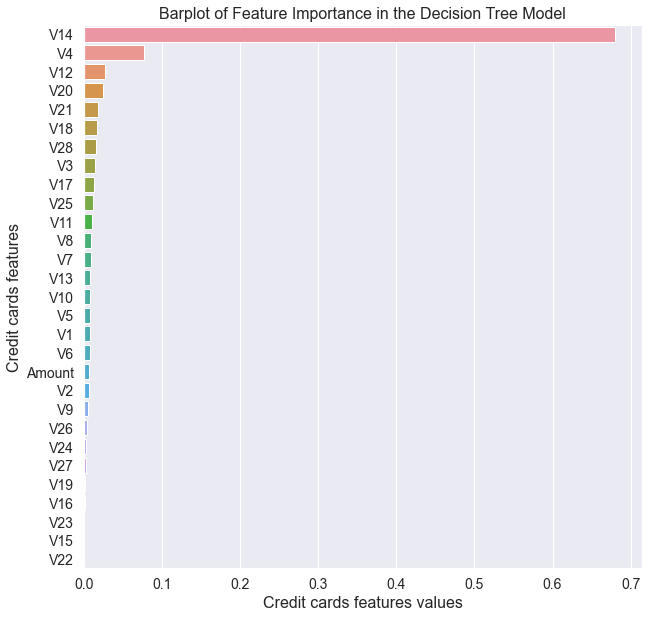

In [20]:
# making a bar plot of the feature importances
sn.set(rc={'figure.figsize':(10,10)})
sn.barplot(x=sorted_importances, y=sorted_feature_names,data=data)
plt.ylabel("Credit cards features", fontsize=16)
plt.xlabel("Credit cards features values", fontsize=16)
plt.title("Barplot of Feature Importance in the Decision Tree Model", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
decision_tree_8top_features=sorted_feature_names[0:8]
decision_tree_8top_features

Index(['V14', 'V4', 'V12', 'V20', 'V21', 'V18', 'V28', 'V3'], dtype='object')

In [22]:
#making the classification report for Decision Tree

from sklearn.metrics import classification_report
print("Classification report for Decision Tree")
print("-"*60)
print(classification_report(y_test, predicted_labels))

Classification report for Decision Tree
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.74      0.76       147

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



#### Tuning Decision Tree hyperparameters

Since the number of rows of the x_train dataset is to high and the RandomizedSearchCV method won't converge, only a sunset of x_train with 10 thousand rows will be used

In [23]:
df_fraud=df[df["Class"]==1]
df_fraud.shape

(492, 30)

In [24]:
df_no_fraud=df[df["Class"]==0]
number_of_rows = df_no_fraud.shape[0] 
random_indices = np.random.choice(number_of_rows, 10000,  
                                  replace=False) 
no_fraud_subset=df_no_fraud.iloc[random_indices,:]
no_fraud_subset.shape

(10000, 30)

In [25]:
df1=pd.concat([df_fraud, no_fraud_subset])
df1.shape

(10492, 30)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(df1.iloc[:, :-1], df1.iloc[:, -1], test_size=0.3, random_state=0)

Since the number of rows of the x_train dataset is to high and the RandomizedSearchCV
method won't converge, only a sunset of x_train will be used

In [27]:
import random as r
max_depth=list(np.arange(2,11))
min_samples_split=list(np.arange(2,11))
min_samples_leaf=list(np.arange(2,11))
param_dict = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
model= Pipeline([("scale",StandardScaler()), 
                    ("random_grid", RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1000), 
                           param_distributions=param_dict, 
                           scoring="accuracy", 
                           refit=True, 
                           n_jobs=-1, 
                           cv=5, 
                           verbose=0))]).fit(X_train, Y_train)





In [ ]:
predicted_labels=model.predict(x_test)

In [ ]:
#visualizing the confusion matrix for Decision Tree
confusion_matrix_visual(y_test, predicted_labels, ["benign", "tumor"])
plt.title("Decision Tree with tuned hyperparameters Confusion matrix", fontsize=16)
plt.show()

In [ ]:
# Print # Print the cross validation score for the training dataset
print(f'The cross validation score is {model["random_grid"].best_score_:.4f}')

# Print the hyperparameters for the best score
print(f'The best hyperparameters are {model["random_grid"].best_params_}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the train dataset is {model["random_grid"].score(model["scale"].fit_transform(x_train), y_train):.4f}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the test dataset is {model["random_grid"].score(model["scale"].transform(x_test), y_test):.4f}')

In [ ]:
#Classification report for Decision Tree

print("Classification report for Decision Tree with tuned hyperparameters")
print("-"*60)
print(classification_report(y_test, predicted_labels))

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 1000)

In [ ]:
#Random Forest model
import time
start_time = time.time()
model=Pipeline([
    ("scale", StandardScaler()),
    ("Tree", classifier)
]).fit(x_train, y_train)
predicted_labels=model.predict(x_test)
elapsed_time = time.time() - start_time
elapsed_time

In [ ]:
#visualizing the confusion matrix for Random Forest
confusion_matrix_visual(y_test, predicted_labels, ["no fraud", "fraud"])
plt.title("Random Forest Confusion matrix", fontsize=16)
plt.show()

In [ ]:
feature_importances = model["Tree"].feature_importances_
feature_importances.shape

In [ ]:
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
data=pd.DataFrame({"sorted_importances":sorted_importances,"sorted_feature_names":sorted_feature_names})
data.head()

In [ ]:
# Create a bar plot of the feature importances
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.barplot(x=sorted_importances, y=sorted_feature_names,data=data)
plt.ylabel("Credit cards features", fontsize=16)
plt.xlabel("Credit cards features values", fontsize=16)
plt.title("Barplot of Feature Importance in the Random Forest Model", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
random_forest_8top_features=sorted_feature_names[0:8]
random_forest_8top_features

In [ ]:
#Classification report for Random Forest

print("Classification report for Random Forest")
print("-"*60)
print(classification_report(y_test, predicted_labels))

#### Logistic Regression

In [ ]:
#generating pipeline object
model=Pipeline([
    ("scale", StandardScaler()),
    ("lr", LogisticRegression(solver="lbfgs", random_state=1000))
]).fit(x_train, y_train)

In [ ]:
#model parameters
model["lr"].get_params()

In [ ]:
#model coefficients
model["lr"].coef_

In [ ]:
#predicting values for the test set
predicted_labels=model.predict(x_test)

In [ ]:
#visualizing the confusion matrix for Logistic Regression
confusion_matrix_visual(y_test, predicted_labels, ["no fraud", "fraud"])
plt.title("Logistic Regression Confusion matrix", fontsize=16)
plt.show()

In [ ]:
#making the classification report for Logistic Regression

from sklearn.metrics import classification_report
print("Classification report for Logistic Regression")
print("-"*60)
print(classification_report(y_test, predicted_labels))

In [ ]:
y_pred=model.predict_proba(x_test)
#making 1D array
y_pred1 = y_pred[:, 1]
y_pred1[:10]

In [ ]:
#frp: False positive rate.
#trp:True positive rate.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
#making ROC curve
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.title("ROC curve", fontsize=16)
plt.show()

#### Tuning the logistic regression model

In [ ]:
y_pred1 = y_pred[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
J = tpr - fpr
#calculation of index corresponding to the maximum difference of true positive rate and 
#false positive rate
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
#decisions is an array of predicted probabilities for X_test for the best threshold
decisions = (model.predict_proba(x_test) >= best_thresh).astype(int)
decisions=decisions[:, 1]
print(argmax(J))


In [ ]:
print(classification_report(y_test, decisions))

In [ ]:
coefficients = model["lr"].coef_[0]
coefficients

In [ ]:
#absolute coefficient values
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

In [ ]:
# feature importance plot
plt.figure(figsize=(10, 7))
sn.set_theme(style="whitegrid")
sn.barplot(data=feature_importance, y='Feature', x='Importance', orient='h')
plt.ylabel("Credit cards features", fontsize=16)
plt.xlabel("Credit cards feature values", fontsize=16)
plt.title("Barplot of Feature Importance in the Logistic Regression Model", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### The 8 top important features will be collected from 3 models and features that are listed in at least in 2 models will be selected as the most important for fraud detection.

In [ ]:
lreg_8top_features=feature_importance.head(8)["Feature"]
lreg_8top_features

In [ ]:
#the df dataframe contains the 8 top features for each model
df=pd.DataFrame({"Logistic Regression":lreg_8top_features, "Decision Tree":decision_tree_8top_features ,"Random Forest":random_forest_8top_features})
df

In [ ]:
#making a list containing all features from df dataframe
mylist=list(df["Logistic Regression"])
mylist.extend(list((df["Decision Tree"])))
mylist.extend(list((df["Random Forest"])))


In [ ]:
#making dictionary with keys that are unique features in the mylist, while values are counts of corresponding keys
mydict={}
for word in mylist:
    mydict[word]=mydict.get(word, 0)+1
print(mydict)

In [ ]:
#selecting features from mydict that have counts 2 or 3.
list_of_top_important_features=[]
for k,v in mydict.items():
    if v>1:
        list_of_top_important_features.append(k)
    
list_of_top_important_features        
    

Conclusion: The best performance to detect credit card fraud showed the logistic regression model with threshold 0.001644<br>
recall (fraud)=0.91<br>
recall (no fraud)=0.96<br>
accuracy=0.96<br>
The six top important features to detect fraud are V4, V10, V14, V20, V12, V13
